In [46]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py                
import cufflinks as cf
%matplotlib inline
from plotly.offline import iplot   
py.offline.init_notebook_mode(connected=True)
cf.go_offline()
import plotly.express as px
import seaborn as sns


In [47]:
# Loading the dataset 
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# Titanic-EDA
In this repository I am working on titanic data and applying all the EDA techniques.

### Dataset exploring 

The RMS Titanic, a luxury steamship, sank in the early hours of April 15, 1912, off the coast of Newfoundland in the North Atlantic after sideswiping an iceberg during its maiden voyage. Of the 2,240 passengers and crew on board, more than 1,500 lost their lives in the disaster.

Our task is to preform EDA based on our observation. 
Let's first see the data column:

1. survival	    Survival	    0 = No, 1 = Yes
2. pclass	    Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
3. sex	        Sex	
4. Age	        Age in years	
5. sibsp	    # of siblings / spouses aboard the 
                            sibsp: The dataset defines family relations in this way...
                            Sibling = brother, sister, stepbrother, stepsister
                            Spouse = husband, wife (mistresses and fiancés were ignored)

6.  parch	     # of parents / children aboard the Titanic	
                            parch: The dataset defines family relations in this way...
                            Parent = mother, father
                            Child = daughter, son, stepdaughter, stepson
                            Some children travelled only with a nanny, therefore parch=0 for them.	

7.  ticket	    Ticket number	
8.  fare	    Passenger fare	
9.  cabin	    Cabin number	
10. embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton
11. alive      Alive person on ship
12. alone      Travelling alone on ship


In [48]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [49]:
# checking the information part
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [50]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [51]:
'''# converting all the data and making it clear.

df['sex'] = df['sex'].map({'male':0,
                           'female':1})
df['embarked'] = df['embarked'].map({'S':0,
                                     'C':1,
                                     'Q':2})
df['class'] = df['class'].map({'First':1,
                               'Second':2,
                               'Third':3})
df['who'] = df['who'].map({'man':0,
                           'woman':1,
                           'child':2})
df['embark_town'] = df['embark_town'].map({'Southampton':0,
                                           'Cherbourg':1,
                                           'Queenstown':2})
df['alive'] = df['alive'].map({'yes':1,
                               'no':0})
df['alone']: df['alone'].map({'True':0,
                              'False':1})'''

"# converting all the data and making it clear.\n\ndf['sex'] = df['sex'].map({'male':0,\n                           'female':1})\ndf['embarked'] = df['embarked'].map({'S':0,\n                                     'C':1,\n                                     'Q':2})\ndf['class'] = df['class'].map({'First':1,\n                               'Second':2,\n                               'Third':3})\ndf['who'] = df['who'].map({'man':0,\n                           'woman':1,\n                           'child':2})\ndf['embark_town'] = df['embark_town'].map({'Southampton':0,\n                                           'Cherbourg':1,\n                                           'Queenstown':2})\ndf['alive'] = df['alive'].map({'yes':1,\n                               'no':0})\ndf['alone']: df['alone'].map({'True':0,\n                              'False':1})"

In [52]:
# Rechecking information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [53]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [54]:
# checking the null values
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

From the above i can see that there are null value present inside two different columns i.e. age and embark_town.
We need to handle it using mean,median, mode.

In [99]:
df.drop(columns=['deck'], axis=1,inplace=True)

In [100]:
df.isnull().sum()

survived      0
pclass        0
sex           0
age           0
sibsp         0
parch         0
fare          0
embarked      0
class         0
who           0
adult_male    0
alive         0
alone         0
dtype: int64

In [55]:
df['age'] = df['age'].fillna(df['age'].median())

In [56]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

From the above observation we can see that embarked and embarked_town have only two missing value and both of the column represent the same thing so what can we do is that we can remove any one column and replace the missing value with other value.

In [57]:
df.drop(columns=['embark_town'], inplace=True,axis=1)

In [58]:
df.dropna(inplace=True)

In [59]:
# rechecking the null values
df.isnull().sum()

survived      0
pclass        0
sex           0
age           0
sibsp         0
parch         0
fare          0
embarked      0
class         0
who           0
adult_male    0
deck          0
alive         0
alone         0
dtype: int64

From the observation we cansees that there are no null values persent inside my data.

In [60]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.666667,1.199005,34.902587,0.447761,0.442786,76.305307
std,0.472582,0.529338,15.075359,0.631274,0.733458,74.891320
min,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,25.000000,0.000000,0.000000,28.712500
50%,1.000000,1.000000,33.000000,0.000000,0.000000,55.000000
75%,1.000000,1.000000,47.000000,1.000000,1.000000,90.000000
max,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


By applying this method we can see the statistical things such as follows:
1. Count of every rows
2. mean of each rows
3. standard deivation for each row from mean
4. minimum value 
5. 25% -- 50% -- 75% percentile range
6. maximum value

### let's start EDA

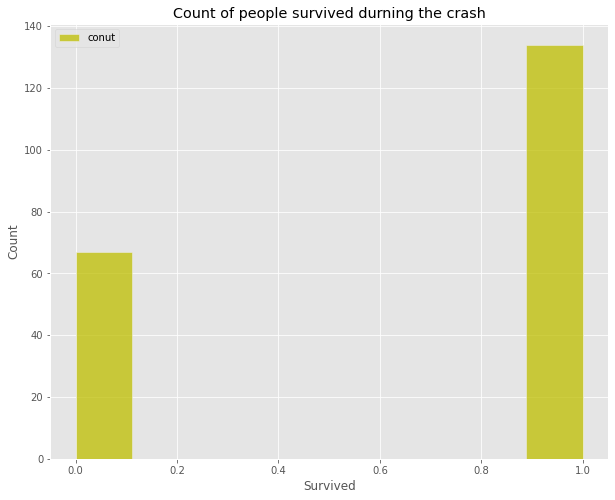

In [61]:
# creating a histogram and checking the count of people survived the crash
from matplotlib import style
style.use('ggplot')
plt.figure(figsize=(10,8))
sns.histplot(data=df,x='survived', color='y',label='conut')
plt.title('Count of people survived durning the crash')
plt.xlabel('Survived')
plt.legend()
plt.show()

In [62]:
df['survived'].value_counts()

1    134
0     67
Name: survived, dtype: int64

From the above observation we can see the count of how many people survived durning the crash. 

If the value is 0 that means Not survived.

If the value is 1 that means survived.


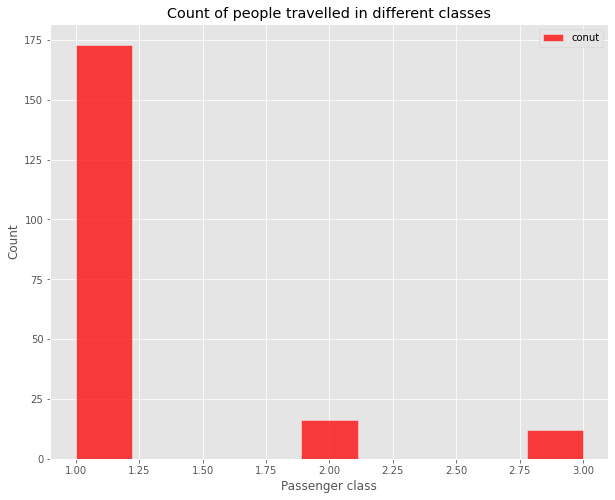

In [63]:
# Creating a histogram for counting the number of people travalled in different class group

plt.figure(figsize=(10,8))
sns.histplot(data=df,x='pclass', color=['r'],label='conut')
plt.title('Count of people travelled in different classes')
plt.xlabel('Passenger class')
plt.legend()
plt.show()

In [64]:
df['pclass'].value_counts()

1    173
2     16
3     12
Name: pclass, dtype: int64

From the above we can see that there are 3 different class group people travelling in and from the plot we  can see that the count of people travelling in class 3 is the most and then followed by the count of people 1 class and then few of them travelled in 2 class.

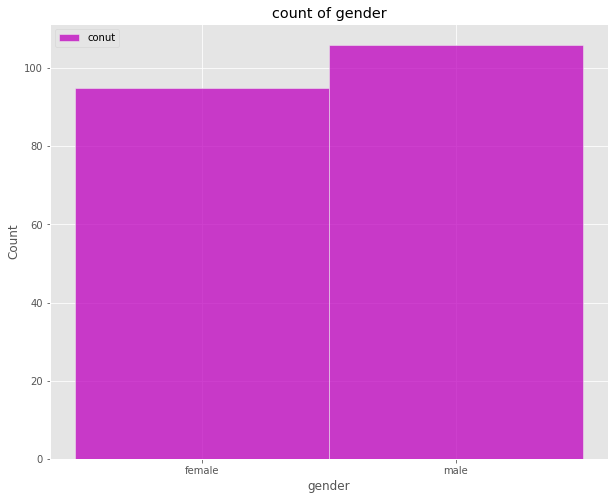

In [65]:
plt.figure(figsize=(10,8))
sns.histplot(data=df,x='sex', color='m',label='conut')
plt.title('count of gender')
plt.xlabel('gender')
plt.legend()
plt.show()

In [66]:
df['sex'].value_counts()

male      106
female     95
Name: sex, dtype: int64

From the above we can see that male travel the most than compare to female and the representation as goes on 0 for male and 1 for female.

In [67]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,yes,True


In [70]:
# SURVIVES VS CLASS

fig = px.bar(df,x='survived', y='class',color='sex',height=400)
fig.show()

The above plot only represent to those who have survived the crash based on different class group with respect to male and female.

In [71]:
# SURVIVES VS EMBARKED
fig = px.bar(df,x='survived', y='embarked',color='sex',height=400)
fig.show()


The plot is constructed to check weather passenger boarding from which port i.e. C = Cherbourg, Q = Queenstown, S = Southampton and we can see that from port Southapton those who have board the ship have survived the most and in that also female was heightest.

In [81]:
fig = px.histogram(df,x='age',color='sex',title='Age group that travelled on ship')

fig.show()

From the above we can see that upto 80 years people travelled on ship that to specifically its 'male' and also the count of male are high than female.

In [97]:
# count the percentage siblings present inside the ship based on gendre
fig = px.pie(df, values="sibsp", names="sex",title='SIBSP')
fig.show()

From the above we can see that the chart represent that sibsp(siblings) this can also be brother, sister, stepbrother, stepsister the pie chart explain the percentage of male and female.

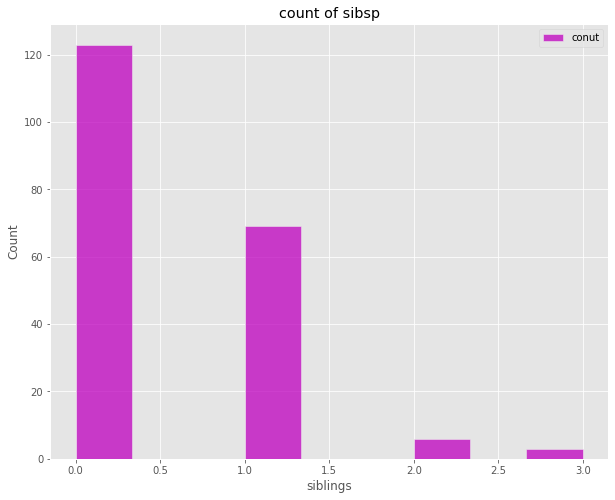

In [98]:
plt.figure(figsize=(10,8))
sns.histplot(data=df,x='sibsp', color='m',label='conut')
plt.title('count of sibsp')
plt.xlabel('siblings')
plt.legend()
plt.show()

brother, sister, stepbrother, stepsister count of them

## Summary:

From this we can see the following:

* . Count of people survived during the crash
* . Which type passenger survived the most 
* . what is the percentage of male and female
* . What is the frequency of age group travelling the most.
* . From which port most of the people board the ship

# Thank you